# MUR Sea Surface Temperature Analysis of Washington State

## Accessing and Visualizing SWOT Simulated Datasets

### Requirement:

1. Compute environment 

This tutorial can only be run in an **AWS cloud instance running in us-west-2**: NASA Earthdata Cloud data in S3 can be directly accessed via temporary credentials; this access is limited to requests made within the US West (Oregon) (code: `us-west-2`) AWS region.

2. Earthdata Login

An Earthdata Login account is required to access data, as well as discover restricted data, from the NASA Earthdata system. Thus, to access NASA data, you need Earthdata Login. Please visit https://urs.earthdata.nasa.gov to register and manage your Earthdata Login account. This account is free to create and only takes a moment to set up.

### Learning Objectives:
- Access cloud-stored MUR Global SST data within AWS cloud, without downloading it to your local machine
- Visualize and analyze data in a use-case example

### GHRSST Level 4 MUR Global Foundation Sea Surface Temperature Analysis (v4.1) Dataset:

1. MUR-JPL-L4-GLOB-v4.1

>DOI: [https://doi.org/10.5067/GHGMR-4FJ04](https://doi.org/10.5067/GHGMR-4FJ04)


_Notebook Author: Zoë Walschots, NASA PO.DAAC (Aug 2023)_

### Import Packages

In [9]:
import h5netcdf
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import hvplot.xarray
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import earthaccess
from earthaccess import Auth, DataCollections, DataGranules, Store

In this notebook, we will be calling the authentication in the below cell.

In [10]:
auth = earthaccess.login(strategy="interactive", persist=True)

We are already authenticated with NASA EDL


### Access and Visualize Data

Let's look at the Sea Surface Temperature of first summer we have data for (2012) by using `earthaccess` search.

In [11]:
mur_results = earthaccess.search_data(short_name = 'MUR-JPL-L4-GLOB-v4.1', temporal = ('2012-05-21', '2012-08-20'), bounding_box = ('-125.41992','45.61181','-116.64844','49.2315'))

Granules found: 92


In [12]:
ds_mur = xr.open_mfdataset(earthaccess.open(mur_results), engine = 'h5netcdf')
ds_mur

 Opening 92 granules, approx size: 0.0 GB


SUBMITTING | :   0%|          | 0/92 [00:00<?, ?it/s]

PROCESSING | :   0%|          | 0/92 [00:00<?, ?it/s]

COLLECTING | :   0%|          | 0/92 [00:00<?, ?it/s]

<xarray.Dataset>
Dimensions:           (time: 92, lat: 17999, lon: 36000)
Coordinates:
  * time              (time) datetime64[ns] 2012-05-21T09:00:00 ... 2012-08-2...
  * lat               (lat) float32 -89.99 -89.98 -89.97 ... 89.97 89.98 89.99
  * lon               (lon) float32 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
Data variables:
    analysed_sst      (time, lat, lon) float32 dask.array<chunksize=(1, 17999, 36000), meta=np.ndarray>
    analysis_error    (time, lat, lon) float32 dask.array<chunksize=(1, 17999, 36000), meta=np.ndarray>
    mask              (time, lat, lon) float32 dask.array<chunksize=(1, 17999, 36000), meta=np.ndarray>
    sea_ice_fraction  (time, lat, lon) float32 dask.array<chunksize=(1, 17999, 36000), meta=np.ndarray>
Attributes: (12/47)
    Conventions:                CF-1.5
    title:                      Daily MUR SST, Final product
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    references:                 http://podaac.jpl.nasa.gov/Multi-scale_Ultra-...
    institution:                Jet Propulsion Laboratory
    history:                    created at nominal 4-day latency; replaced nr...
    ...                         ...
    project:                    NASA Making Earth Science Data Records for Us...
    publisher_name:             GHRSST Project Office
    publisher_url:              http://www.ghrsst.org
    publisher_email:            ghrsst-po@nceo.ac.uk
    processing_level:           L4
    cdm_data_type:              grid

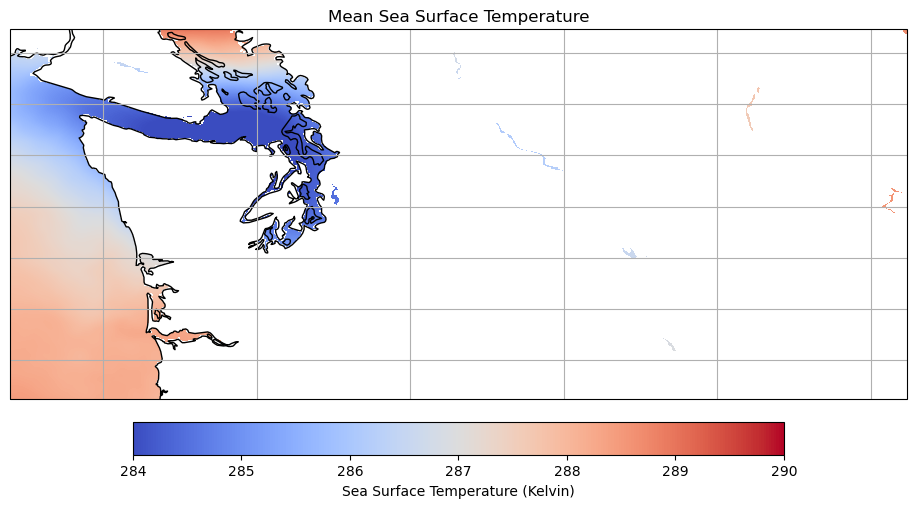

In [13]:
# we want the sea surface temperature variable for this visualization
ds = ds_mur['analysed_sst']

# Subset the dataset so that the program can run the code better
ds_subset = ds.sel(time=slice('2012-05-21T09:00:00', '2012-08-20T09:00:00'))
lat_range = slice(45.61181, 49.2315)
lon_range = slice(-125.41992, -116.64844)
ds_subset = ds_subset.sel(lat=lat_range, lon=lon_range)

# Calculate the mean across the time dimension
mean_data = ds_subset.mean(dim='time')

fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set the range for the colorbar here
colorbar_range = (284, 290)

im = ax.imshow(mean_data.values, cmap='coolwarm', origin='lower', transform=ccrs.PlateCarree(),
               extent=[mean_data.lon.min(), mean_data.lon.max(), mean_data.lat.min(), mean_data.lat.max()],
               vmin=colorbar_range[0], vmax=colorbar_range[1])  # Use vmin and vmax to set the range

cbar = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.05, shrink=0.7)
cbar.set_label('Sea Surface Temperature (Kelvin)')
ax.set_title('Mean Sea Surface Temperature')
ax.coastlines()
ax.gridlines()

plt.show()

Let's also look at the most recent summer we have data for (2022) in comparison.

In [6]:
mur_results_2 = earthaccess.search_data(short_name = 'MUR-JPL-L4-GLOB-v4.1', temporal = ('2022-05-21', '2022-08-20'), bounding_box = ('-125.41992','45.61181','-116.64844','49.2315'))

Granules found: 92


In [7]:
ds_mur_2 = xr.open_mfdataset(earthaccess.open(mur_results_2), engine = 'h5netcdf')
ds_mur_2

 Opening 92 granules, approx size: 0.0 GB


SUBMITTING | :   0%|          | 0/92 [00:00<?, ?it/s]

PROCESSING | :   0%|          | 0/92 [00:00<?, ?it/s]

COLLECTING | :   0%|          | 0/92 [00:00<?, ?it/s]

<xarray.Dataset>
Dimensions:           (time: 92, lat: 17999, lon: 36000)
Coordinates:
  * time              (time) datetime64[ns] 2022-05-21T09:00:00 ... 2022-08-2...
  * lat               (lat) float32 -89.99 -89.98 -89.97 ... 89.97 89.98 89.99
  * lon               (lon) float32 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
Data variables:
    analysed_sst      (time, lat, lon) float32 dask.array<chunksize=(1, 17999, 36000), meta=np.ndarray>
    analysis_error    (time, lat, lon) float32 dask.array<chunksize=(1, 17999, 36000), meta=np.ndarray>
    mask              (time, lat, lon) float32 dask.array<chunksize=(1, 17999, 36000), meta=np.ndarray>
    sea_ice_fraction  (time, lat, lon) float32 dask.array<chunksize=(1, 17999, 36000), meta=np.ndarray>
    dt_1km_data       (time, lat, lon) timedelta64[ns] dask.array<chunksize=(1, 17999, 36000), meta=np.ndarray>
    sst_anomaly       (time, lat, lon) float32 dask.array<chunksize=(1, 17999, 36000), meta=np.ndarray>
Attributes: (12/47)
    Conventions:                CF-1.7
    title:                      Daily MUR SST, Final product
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    references:                 http://podaac.jpl.nasa.gov/Multi-scale_Ultra-...
    institution:                Jet Propulsion Laboratory
    history:                    created at nominal 4-day latency; replaced nr...
    ...                         ...
    project:                    NASA Making Earth Science Data Records for Us...
    publisher_name:             GHRSST Project Office
    publisher_url:              http://www.ghrsst.org
    publisher_email:            ghrsst-po@nceo.ac.uk
    processing_level:           L4
    cdm_data_type:              grid

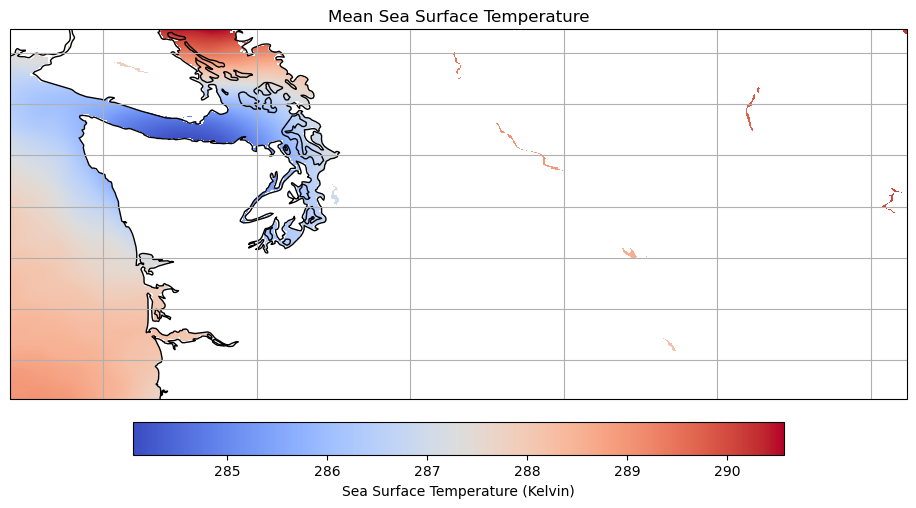

In [8]:
# we want the sea surface temperature variable for this visualization
ds_2 = ds_mur_2['analysed_sst']

# Subset the dataset so that the program can run the code better
ds_subset_2 = ds_2.sel(time=slice('2022-05-21T09:00:00', '2022-08-20T09:00:00'))
lat_range = slice(45.61181, 49.2315)
lon_range = slice(-125.41992, -116.64844)
ds_subset_2 = ds_subset_2.sel(lat=lat_range, lon=lon_range)

# Calculate the mean across the time dimension
mean_data = ds_subset_2.mean(dim='time')

fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set the range for the colorbar here
colorbar_range = (284, 290)

im = ax.imshow(mean_data.values, cmap='coolwarm', origin='lower', transform=ccrs.PlateCarree(),
               extent=[mean_data.lon.min(), mean_data.lon.max(), mean_data.lat.min(), mean_data.lat.max()])
cbar = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.05, shrink=0.7)
cbar.set_label('Sea Surface Temperature (Kelvin)')
ax.set_title('Mean Sea Surface Temperature')
ax.coastlines()
ax.gridlines()

plt.show()
